# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

smt = SMOTE(random_state=12)

In [2]:
# read the dataset 

df = pd.read_csv('Depression.csv')
print(df.shape)
df.head()

(758, 35)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderately Severe,Yes


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  16  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  70  unique values
Feature  semester  has  22  unique values
Feature  sibilings  has  13  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
Feature  wakeup  has  76  unique values
Feature  breakfast  has  71  unique values
Feature  launch  has  58  unique values
Feature  dinner  has  27  unique values
Feature  sleep  has  65  unique values
Feature  hobbies  has  187  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alch

# Data Visualization

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

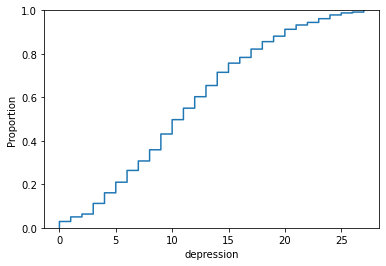

In [4]:
sns.ecdfplot(x = 'depression', data = df)

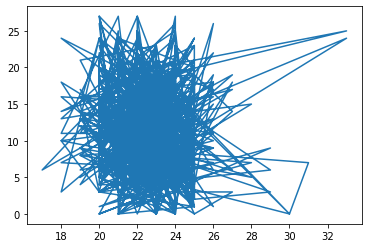

In [5]:
x = df['age']
y = df['depression']
plt.plot(x, y)

<AxesSubplot:xlabel='gender', ylabel='depression'>

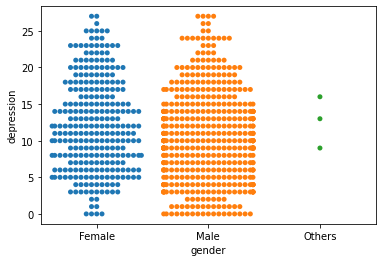

In [6]:
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='gender', ylabel='depression'>

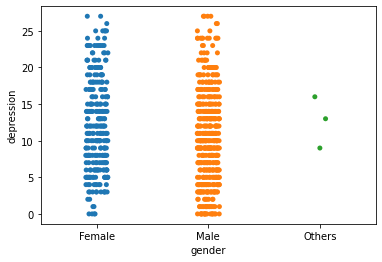

In [7]:
sns.stripplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

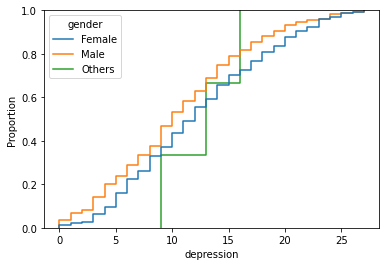

In [8]:
sns.ecdfplot(x = 'depression', data = df, hue = 'gender')

<AxesSubplot:xlabel='depression', ylabel='Count'>

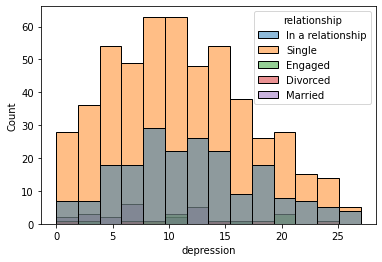

In [9]:
sns.histplot(x = 'depression', data = df, hue = 'relationship')

<AxesSubplot:xlabel='depression', ylabel='age'>

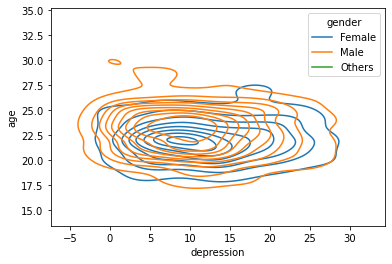

In [10]:
sns.kdeplot(x = 'depression', y = 'age', hue = 'gender', data = df)

In [11]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 215, 'Mild': 205, 'Moderately Severe': 126, 'None': 122, 'Severe': 90})
dict_values([126, 122, 90, 215, 205])
dict_keys(['Moderately Severe', 'None', 'Severe', 'Moderate', 'Mild'])
[('Moderate', 215), ('Mild', 205), ('Moderately Severe', 126)]
{'Moderately Severe': 126, 'None': 122, 'Severe': 90, 'Moderate': 215, 'Mild': 205}


([<matplotlib.patches.Wedge at 0x1e9cd510490>,
 [Text(0.9533868822548479, 0.5486833811447008, 'Moderately Severe'),
  Text(0.02279358610591973, 1.099763816659028, 'None'),
  Text(-0.8321382334339209, 0.7194066725138666, 'Severe'),
  Text(-0.9370694660790571, -0.5761083368102836, 'Moderate'),
  Text(0.7262795594920571, -0.8261464770027308, 'Mild')],
 [Text(0.5200292085026442, 0.29928184426074583, '16.6%'),
  Text(0.012432865148683489, 0.5998711727231062, '16.1%'),
  Text(-0.45389358187304774, 0.3924036395530181, '11.9%'),
  Text(-0.5111287996794855, -0.3142409109874274, '28.4%'),
  Text(0.39615248699566746, -0.45062535109239854, '27.0%')])

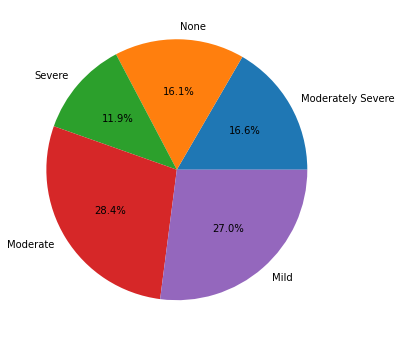

In [12]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [13]:
# checing for null values
df.isnull().sum()

mood               0
age                0
gender             0
subject            0
semester           0
sibilings          0
living             0
employment         0
personality        0
relationship       0
wakeup             0
breakfast          0
launch             0
dinner             0
sleep              0
hobbies            0
smoker             0
alcholic           0
drug addicted      0
friends            0
hangout            0
social events      0
pray               0
sports             0
exercise           0
meditation         0
video games        0
study hours        0
phone hours        0
medication         2
movies per week    0
music hours        0
depression         0
category           0
verdict            0
dtype: int64

In [14]:
# remove null entries
df.dropna(inplace = True)

# remove duplicate entries, if any
df.drop_duplicates(inplace = True)

print(df.shape)

(756, 35)


In [15]:
df.describe()

,age,semester,sibilings,friends,study hours,music hours,depression
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,22.543651,7.947090,1.746032,3.776455,2.792328,1.723545,11.177249
std,2.006466,4.809191,1.421331,5.067651,2.201864,1.871084,6.307385
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,2.000000,1.000000,1.000000,6.000000
50%,22.000000,8.000000,1.000000,3.000000,2.000000,1.000000,11.000000
75%,24.000000,11.000000,2.000000,5.000000,4.000000,2.000000,15.000000
max,33.000000,83.000000,20.000000,100.000000,10.000000,10.000000,27.000000


In [16]:
# observe dataset and check for outliers
for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

Happy     286
Tensed    186
Lost      156
Sad       108
Angry      20
Name: mood, dtype: int64

22    144
23    143
21    133
24    115
25     81
20     74
19     21
26     17
18     10
27      6
28      3
29      3
30      2
33      2
17      1
31      1
Name: age, dtype: int64

Male      475
Female    278
Others      3
Name: gender, dtype: int64

Engineering                        384
Business                           206
Pharmacy                            28
MBBS                                16
Law                                 15
                                  ... 
Environmental management             1
College/Humanities                   1
Biochemistry and biotechnology       1
Physics                              1
Not admitted yet                     1
Name: subject, Length: 70, dtype: int64

5     108
11     95
12     85
8      68
10     56
1      48
4      47
7      40
2      39
9      38
6      35
13     29
3      27
14     20
15      9
16      5
17      2
19      1

In [17]:
# settin limits for features
limit = {
    'age': 27,
    'semester': 17,
    'sibilings': 6,
    'friends': 15,
}

# drop rows where limit exceed for features
for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)
    
print(df.shape)

(732, 35)


In [18]:
# Convert Catergorical values to numeric representation
# df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
# df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
# df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
# df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
# df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
# df['video games'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
# df['social events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
# df['phone hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)
df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderately Severe,Yes


In [19]:
cat_features = []
# these are categorical features but has so many unique values, confused what to do with these feature!
# cat_features = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', ]

# selecting categorical features where unique values <= 6
for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype != np.int64 and len(unique_vals) <= 6:
        cat_features.append(cols)

cat_features.remove('category')  # target column for category prediction
cat_features.remove('verdict')  # target column for binary prediction
cat_features

['mood',
 'gender',
 'living',
 'employment',
 'personality',
 'relationship',
 'smoker',
 'alcholic',
 'drug addicted',
 'hangout',
 'social events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video games',
 'phone hours',
 'medication']

In [20]:
# convert categorical values to numeric representation
df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,age,subject,semester,sibilings,wakeup,breakfast,launch,dinner,sleep,hobbies,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
0,24,Engineering,9,3,11:20:00 AM,1:10:00 AM,4:20:00 PM,9:20:00 PM,4:20:00 AM,Sleeping,...,1,0,0,0,0,0,1,0,1,0
1,23,Engineering,11,3,12:00:00 PM,12:15:00 PM,4:30:00 PM,10:30:00 PM,4:00:00 AM,Traveling,...,0,0,1,0,1,0,0,0,1,0
2,19,Pharmacy,3,0,8:30:00 AM,10:00:00 AM,3:00:00 PM,10:00:00 PM,1:00:00 AM,"Music, Painting",...,1,0,0,0,0,0,1,0,1,0
3,23,Engineering,13,1,2:00:00 PM,3:00:00 PM,7:00:00 PM,12:00:00 AM,3:00:00 AM,"Music, Programming",...,0,0,0,1,1,0,0,0,1,0
4,22,Engineering,11,1,11:00:00 AM,11:30:00 AM,3:00:00 PM,11:30:00 PM,3:30:00 AM,Music,...,0,0,0,1,0,0,1,0,1,0


In [21]:
df.describe()

,age,semester,sibilings,friends,study hours,music hours,depression,mood_Angry,mood_Happy,mood_Lost,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,2.812842,1.722678,11.204918,0.024590,0.375683,0.209016,...,0.389344,0.137978,0.303279,0.169399,0.133880,0.393443,0.247268,0.225410,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,2.204137,1.872365,6.262745,0.154978,0.484630,0.406884,...,0.487935,0.345113,0.459989,0.375360,0.340756,0.488848,0.431719,0.418138,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,2.000000,1.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,4.000000,2.000000,15.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,10.000000,10.000000,27.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [22]:
# decide what to do with subjec, time columns, hobbies, and movies per week
X = df.drop(columns = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', ])
X = X.drop(columns = ['depression', 'category', 'verdict', ]) # X contains the features 
y = df['category']  # for specific class prediction
print(X.shape)
X.head()

(732, 63)


,age,semester,sibilings,friends,study hours,music hours,mood_Angry,mood_Happy,mood_Lost,mood_Sad,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
0,24,9,3,2,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,23,11,3,4,4,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,19,3,0,4,3,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,23,13,1,1,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4,22,11,1,5,2,4,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [23]:
x.describe()

count    758.000000
mean      22.544855
std        2.004610
min       17.000000
25%       21.000000
50%       22.000000
75%       24.000000
max       33.000000
Name: age, dtype: float64

In [24]:
scale_vars = []
for cols in X.columns:
    if X[cols].dtype == np.int64 and X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age', 'semester', 'sibilings', 'friends', 'study hours', 'music hours']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 20)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(622, 63)
(110, 63)


,age,semester,sibilings,friends,study hours,music hours,mood_Angry,mood_Happy,mood_Lost,mood_Sad,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
412,21,5,1,3,3,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
31,22,6,1,3,1,2,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
624,21,5,1,1,5,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
730,23,8,1,2,4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
387,22,11,3,2,2,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [26]:
# Using SMOTE
# print(collections.Counter(y_train))
# X_train, y_train = smt.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

In [27]:
# using min_max scaler to scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [28]:
X_train.head()

,age,semester,sibilings,friends,study hours,music hours,mood_Angry,mood_Happy,mood_Lost,mood_Sad,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
412,0.4,0.2500,0.166667,0.200000,0.3,0.1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
31,0.5,0.3125,0.166667,0.200000,0.1,0.2,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
624,0.4,0.2500,0.166667,0.066667,0.5,0.1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
730,0.6,0.4375,0.166667,0.133333,0.4,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
387,0.5,0.6250,0.500000,0.133333,0.2,0.1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [29]:
X_test.head()

,age,semester,sibilings,friends,study hours,music hours,mood_Angry,mood_Happy,mood_Lost,mood_Sad,...,video games_Not at all,video games_Often,video games_Sometimes,video games_Very Often,phone hours_0 to 2,phone hours_3 to 5,phone hours_6 to 8,phone hours_more than 8,medication_No,medication_Yes
293,0.7,0.3750,0.333333,0.000000,0.1,0.0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
469,0.5,0.1875,0.000000,0.666667,0.6,0.1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
276,0.1,0.0000,0.333333,0.666667,0.2,0.2,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
279,0.8,0.0000,0.333333,0.066667,0.0,0.7,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
124,0.4,0.6250,0.166667,0.333333,0.2,0.6,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


# Feature Selection

In [30]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
X_train = X_train.drop(columns = featuresWithZeroVariance)
X_test = X_test.drop(columns = featuresWithZeroVariance)
featuresWithZeroVariance

[]

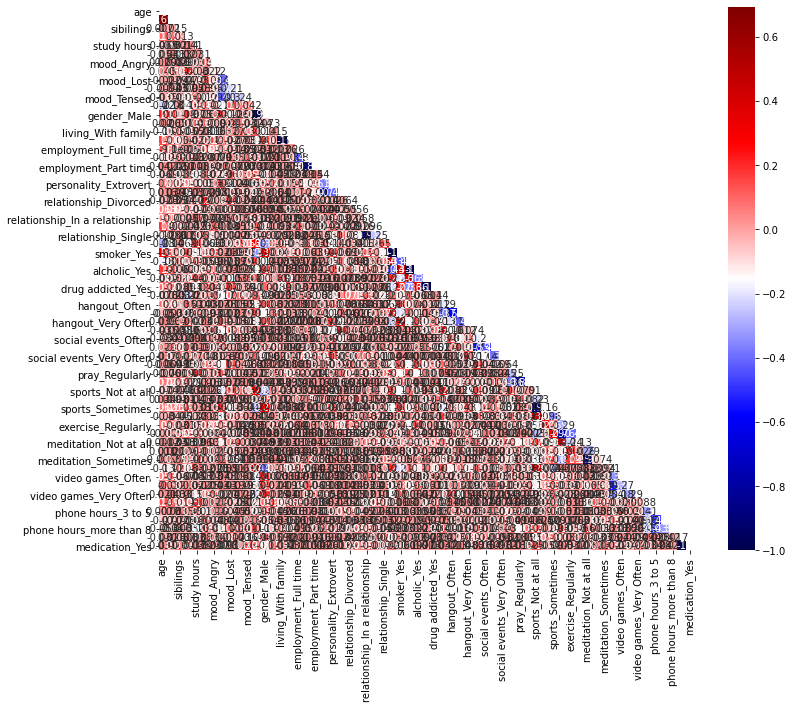

In [31]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

9
{'gender_Male', 'smoker_Yes', 'medication_Yes', 'drug addicted_Yes', 'alcholic_Yes', 'meditation_Sometimes', 'living_Without family', 'relationship_Single', 'sports_Sometimes'}


In [34]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(622, 54)
(110, 54)


# Model Creation and Evaluation(Predict Specific Category)

In [35]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.2797427652733119
Test Accuracy:  0.32727272727272727


2
Depth =  2 , Training Accuracy =  0.3536977491961415 , Test Accuracy =  0.32727272727272727 , Diff =  2.6425021923414227  %
3
Depth =  3 , Training Accuracy =  0.3665594855305466 , Test Accuracy =  0.37272727272727274 , Diff =  0.6167787196726116  %
Depth =  4 , Training Accuracy =  0.40836012861736337 , Test Accuracy =  0.3181818181818182 , Diff =  9.01783104355452  %
Depth =  5 , Training Accuracy =  0.45016077170418006 , Test Accuracy =  0.3 , Diff =  15.016077170418008  %
Depth =  6 , Training Accuracy =  0.5080385852090032 , Test Accuracy =  0.39090909090909093 , Diff =  11.712949429991232  %
Depth =  7 , Training Accuracy =  0.5852090032154341 , Test Accuracy =  0.37272727272727274 , Diff =  21.248173048816138  %
Depth =  8 , Training Accuracy =  0.6446945337620579 , Test Accuracy =  0.3 , Diff =  34.46945337620579  %
Depth =  9 , Training Accuracy =  0.7218649517684887 , Test Accuracy =  0.2636363636363636 , Diff =  45.82285881321251  %
Depth =  10 , Training Accuracy =  0.802

Text(0, 0.5, 'Accuracy')

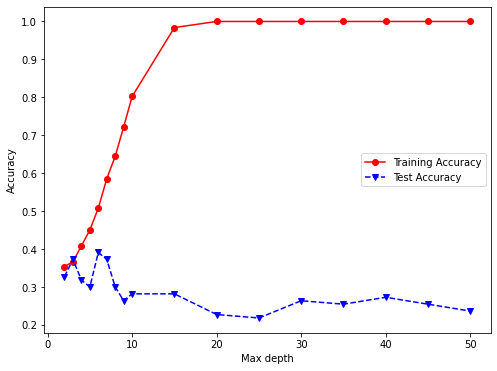

In [36]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print(classification_report(y_test, y_predTest))
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

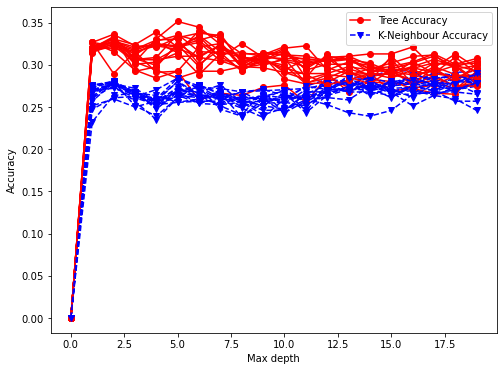

In [37]:
# # using stratified k-fold 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for n in range(2, 20):
    skfold = StratifiedKFold(n_splits=n)
    treeAcc = np.zeros(20)
    neighbourAcc = np.zeros(20)
    for depth in range(1, 20):
        clf = DecisionTreeClassifier(max_depth=depth)
        results = cross_val_score(clf, X, y, cv = skfold)
        treeAcc[depth] = np.mean(results)
        clf = KNeighborsClassifier(n_neighbors=depth, metric='minkowski', p=2)
        results = cross_val_score(clf, X, y, cv = skfold)
        neighbourAcc[depth] = np.mean(results)
    plt.plot([i for i in range(20)], treeAcc,'ro-',[i for i in range(20)], neighbourAcc,'bv--')
    plt.legend(['Tree Accuracy','K-Neighbour Accuracy'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.3 , Difference =  70.0 %
K =  5 , Training Accuracy =  0.5353697749196141  Test Accuracy =  0.35454545454545455 , Difference =  18.08243203741596 %
K =  10 , Training Accuracy =  0.4565916398713826  Test Accuracy =  0.37272727272727274 , Difference =  8.386436714410989 %
K =  15 , Training Accuracy =  0.40353697749196143  Test Accuracy =  0.39090909090909093 , Difference =  1.2627886582870507 %
K =  20 , Training Accuracy =  0.40353697749196143  Test Accuracy =  0.38181818181818183 , Difference =  2.1718795673779603 %
K =  25 , Training Accuracy =  0.3842443729903537  Test Accuracy =  0.38181818181818183 , Difference =  0.24261911721718543 %
K =  30 , Training Accuracy =  0.3745980707395498  Test Accuracy =  0.37272727272727274 , Difference =  0.1870798012277075 %


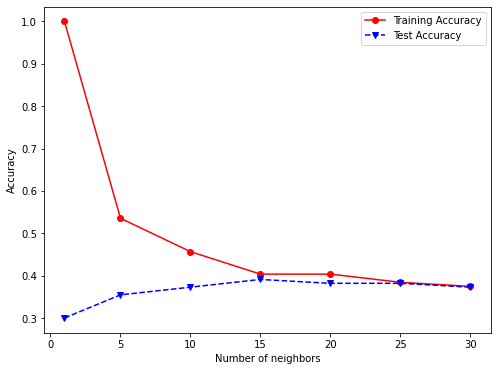

In [38]:
# KNN with Euclidean Distance Metric

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.3090909090909091 , Difference =  69.0909090909091 %
K =  5 , Training Accuracy =  0.5401929260450161  Test Accuracy =  0.36363636363636365 , Difference =  17.655656240865248 %
K =  10 , Training Accuracy =  0.4646302250803859  Test Accuracy =  0.32727272727272727 , Difference =  13.735749780765861 %
K =  15 , Training Accuracy =  0.40514469453376206  Test Accuracy =  0.4 , Difference =  0.514469453376204 %
K =  20 , Training Accuracy =  0.40192926045016075  Test Accuracy =  0.35454545454545455 , Difference =  4.73838059047062 %
K =  25 , Training Accuracy =  0.3778135048231511  Test Accuracy =  0.39090909090909093 , Difference =  1.3095586085939803 %
K =  30 , Training Accuracy =  0.3729903536977492  Test Accuracy =  0.32727272727272727 , Difference =  4.5717626425021916 %


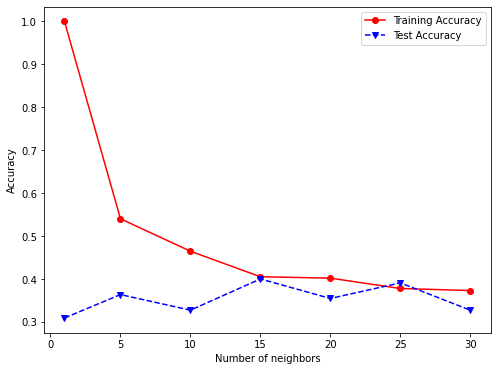

In [39]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Logistic Regression with no regularization
Train Accuracy:  0.4678456591639871
Test Accuracy:  0.41818181818181815

Logistic Regression with L2 regularization
Train Accuracy:  0.47106109324758844
Test Accuracy:  0.4
                   precision    recall  f1-score   support

             Mild       0.41      0.38      0.39        29
         Moderate       0.42      0.47      0.45        36
Moderately Severe       0.28      0.26      0.27        19
             None       0.50      0.53      0.51        17
           Severe       0.29      0.22      0.25         9

         accuracy                           0.40       110
        macro avg       0.38      0.37      0.37       110
     weighted avg       0.40      0.40      0.40       110



In [41]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.3360128617363344
Test Accuracy:  0.2636363636363636
                   precision    recall  f1-score   support

             Mild       0.27      0.62      0.38        29
         Moderate       0.22      0.19      0.21        36
Moderately Severe       0.20      0.05      0.08        19
             None       0.43      0.18      0.25        17
           Severe       0.00      0.00      0.00         9

         accuracy                           0.26       110
        macro avg       0.22      0.21      0.18       110
     weighted avg       0.24      0.26      0.22       110



In [42]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.4115755627009646
Test Accuracy:  0.38181818181818183
                   precision    recall  f1-score   support

             Mild       0.33      0.38      0.35        29
         Moderate       0.44      0.42      0.43        36
Moderately Severe       0.33      0.21      0.26        19
             None       0.47      0.53      0.50        17
           Severe       0.25      0.33      0.29         9

         accuracy                           0.38       110
        macro avg       0.37      0.37      0.37       110
     weighted avg       0.38      0.38      0.38       110



In [43]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.3633440514469453
Test Accuracy:  0.35454545454545455
                   precision    recall  f1-score   support

             Mild       0.32      0.52      0.39        29
         Moderate       0.38      0.67      0.48        36
Moderately Severe       0.00      0.00      0.00        19
             None       0.00      0.00      0.00        17
           Severe       0.00      0.00      0.00         9

         accuracy                           0.35       110
        macro avg       0.14      0.24      0.18       110
     weighted avg       0.21      0.35      0.26       110



In [44]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[15 14  0  0  0]
 [12 24  0  0  0]
 [ 5 14  0  0  0]
 [14  3  0  0  0]
 [ 1  8  0  0  0]]

Classification Report
                   precision    recall  f1-score   support

             Mild      0.319     0.517     0.395        29
         Moderate      0.381     0.667     0.485        36
Moderately Severe      0.000     0.000     0.000        19
             None      0.000     0.000     0.000        17
           Severe      0.000     0.000     0.000         9

         accuracy                          0.355       110
        macro avg      0.140     0.237     0.176       110
     weighted avg      0.209     0.355     0.263       110



In [45]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)

ValueError: SVC should be a binary classifier